In [1]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=2, random_state=None, shuffle=False)


In [2]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]


TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [4]:
import numpy as np
from sklearn.model_selection import KFold
X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
 print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.8, random_state=0)
X_train.shape, y_train.shape
X_test.shape, y_test.shape
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)


0.9333333333333333

In [10]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [11]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [12]:
from sklearn import metrics
scores = cross_val_score(
 clf, X, y, cv=5, scoring='f1_macro')
scores


array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np


In [29]:
X, y = load_breast_cancer(return_X_y=True)

In [32]:

from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

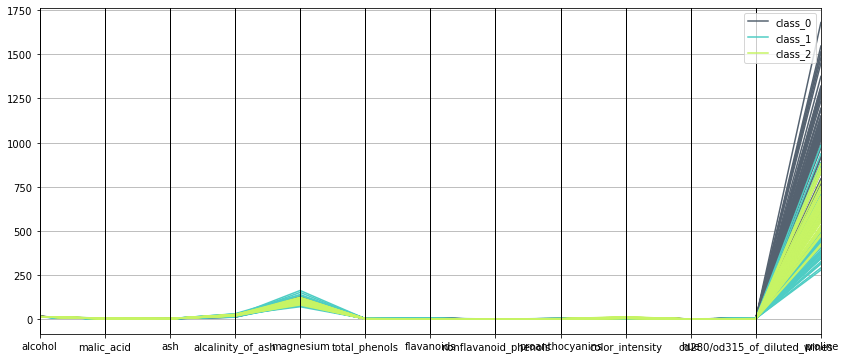

In [41]:

df['target_names'] = [wine.target_names[i] for i in wine.target]

# Parallel Coordinates Start Here:
plt.figure(figsize=(14, 6))
pd.plotting.parallel_coordinates(
 df, 'target_names', color=('#556270', '#4ECDC4', '#C7F464')
)
plt.show()


In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
import numpy as np
X, y = load_breast_cancer(return_X_y=True)

X.shape, y.shape

((569, 30), (569,))

In [48]:
lr=LogisticRegression(solver='lbfgs', max_iter=8000)
kf = KFold(n_splits=4)
for train, test in kf.split(X):
    #print(f'{train} {test}')
    clf = svm.SVC(kernel='linear', C=1).fit(X[train], y[train])
    y_pred=clf.predict(X[test])
    print(metrics.accuracy_score(y[test],y_pred))

0.9370629370629371
0.9507042253521126
0.9577464788732394
0.9507042253521126


In [49]:
lr_kfold=LogisticRegression(solver='lbfgs', max_iter=8000)
kf = KFold(n_splits=5)
for train, test in kf.split(X):
 # print("%s %s" % (train, test))
 clf = lr_kfold.fit(X[train], y[train])
 y_pred=clf.predict(X[test])
 print(metrics.accuracy_score(y[test],y_pred))

0.9122807017543859
0.956140350877193
0.9649122807017544
0.9736842105263158
0.9469026548672567
